# Importing Data & Needed Packages

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import  BaggingClassifier, Rando
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_errormForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification



__________________________________________________________________________

# Cleaning Data

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.isna().sum()

In [ ]:
df=df.dropna()

In [ ]:
for index, row in df.iterrows():
    if row['loan_percent_income'] == 0:
        # Drop row where interest_rate is 0
        df.drop(index, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


for index, row in df.iterrows():
    if row['person_age'] >= 122:
        # Drop row where interest_rate is 0
        df.drop(index, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df = df.drop(df[df['person_emp_length'] == 123].index)

In [ ]:
pd.read_csv('credit_risk_cleaned.csv')

____________________________________________________________________________________________

# Loading in Clean Data

In [2]:
df_cleaned=pd.read_csv("credit_risk_cleaned.csv")
display(df_cleaned)

person_age  person_income person_home_ownership  person_emp_length  \
0              21           9600                   OWN                5.0   
1              25           9600              MORTGAGE                1.0   
2              23          65500                  RENT                4.0   
3              24          54400                  RENT                8.0   
4              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
28620          57          53000              MORTGAGE                1.0   
28621          54         120000              MORTGAGE                4.0   
28622          65          76000                  RENT                3.0   
28623          56         150000              MORTGAGE                5.0   
28624          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            EDUCATION          B       1000          11.14            0   
1              MEDICAL          C       5500          12.87            1   
2              MEDICAL          C      35000          15.23            1   
3              MEDICAL          C      35000          14.27            1   
4              VENTURE          A       2500           7.14            1   
...                ...        ...        ...            ...          ...   
28620         PERSONAL          C       5800          13.16            0   
28621         PERSONAL          A      17625           7.49            0   
28622  HOMEIMPROVEMENT          B      35000          10.99            1   
28623         PERSONAL          B      15000          11.48            0   
28624          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.10                         N   
1                     0.57                         N   
2                     0.53                         N   
3                     0.55                         Y   
4                     0.25                         N   
...                    ...                       ...   
28620                 0.11                         N   
28621                 0.15                         N   
28622                 0.46                         N   
28623                 0.10                         N   
28624                 0.15                         N   

       cb_person_cred_hist_length  
0                               2  
1                               3  
2                               2  
3                               4  
4                               2  
...                           ...  
28620                          30  
28621                          19  
28622                          28  
28623                          26  
28624                          30  

[28625 rows x 12 columns]

______________________________________________________________________________

# Examining the relation of Loan Grade & Loan Status

In [3]:
df_loan_status_and_grade=df_cleaned[["loan_grade","loan_status"]]
df_loan_status_and_grade = pd.get_dummies(df_loan_status_and_grade, drop_first=True)
display(df_loan_status_and_grade)

loan_status  loan_grade_B  loan_grade_C  loan_grade_D  loan_grade_E  \
0                0          True         False         False         False   
1                1         False          True         False         False   
2                1         False          True         False         False   
3                1         False          True         False         False   
4                1         False         False         False         False   
...            ...           ...           ...           ...           ...   
28620            0         False          True         False         False   
28621            0         False         False         False         False   
28622            1          True         False         False         False   
28623            0          True         False         False         False   
28624            0          True         False         False         False   

       loan_grade_F  loan_grade_G  
0             False         False  
1             False         False  
2             False         False  
3             False         False  
4             False         False  
...             ...           ...  
28620         False         False  
28621         False         False  
28622         False         False  
28623         False         False  
28624         False         False  

[28625 rows x 7 columns]

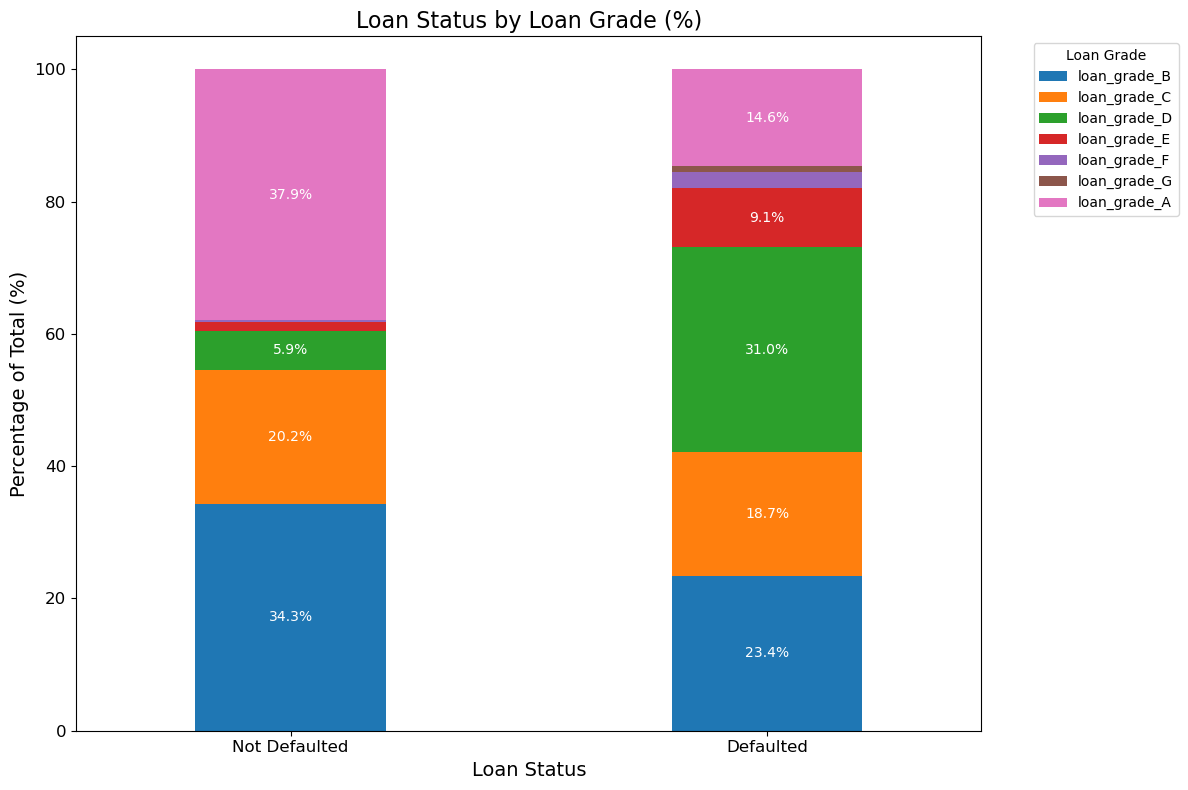

In [4]:
# Add a column for loan_grade_A by checking where all other grades are False
df_loan_status_and_grade['loan_grade_A'] = ~(df_loan_status_and_grade.drop('loan_status', axis=1).any(axis=1))

# Group by loan_status and sum up True values for each loan_grade
grade_counts = df_loan_status_and_grade.groupby('loan_status').sum()

# Convert counts to percentages of the total for each loan_status
grade_percentages = df_loan_status_and_grade.groupby('loan_status').mean() * 100  # Example conversion to percentage

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grade_percentages.plot(kind='bar', stacked=True, ax=ax, width=0.4)
plt.title('Loan Status by Loan Grade (%)', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Percentage of Total (%)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Loan Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding text annotations for each segment
for n, x in enumerate([*grade_percentages.index.values]):
    cumulative_height = 0
    for grade, proportion in grade_percentages.loc[x].items():
        cumulative_height += proportion
        # Only adding text if the segment is large enough to be legible
        if proportion >= 5:  # Adjust threshold as needed
            text_y = cumulative_height - (proportion / 2)
            ax.text(n, text_y, f'{proportion:.1f}%', ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

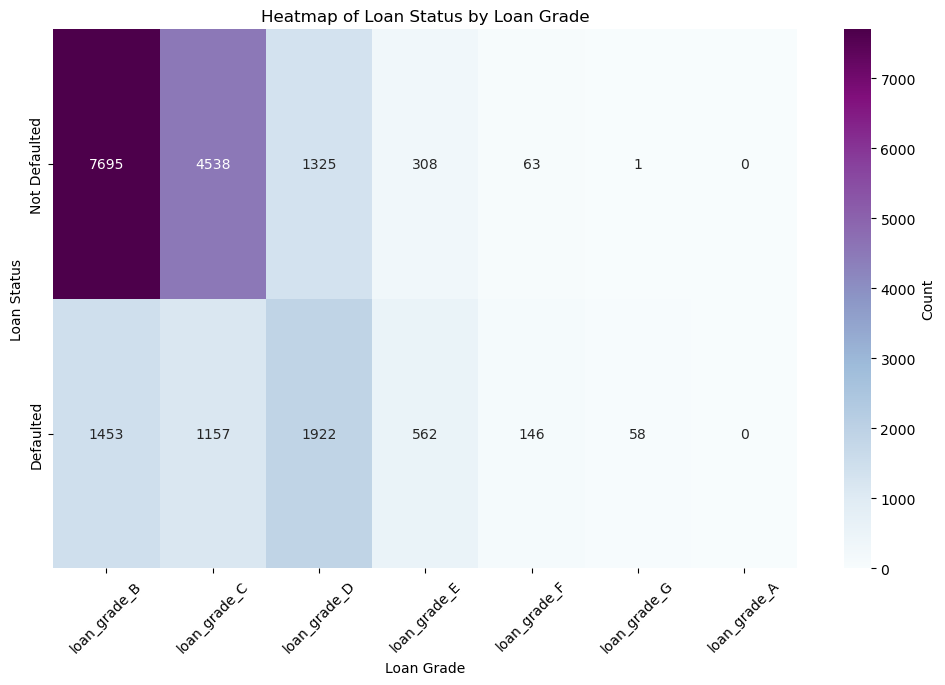

In [5]:
# Add a column for loan_grade_A by checking where all other grades are False
df_loan_status_and_grade['loan_grade_A'] = ~(df_loan_status_and_grade.drop('loan_status', axis=1).any(axis=1))

# Calculate the sum (count of True values) for each combination of loan_status and loan_grade
grade_counts = df_loan_status_and_grade.groupby('loan_status').sum()

# Normalize the counts to get proportions if needed
# grade_counts = grade_counts.div(grade_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))
sns.heatmap(grade_counts, annot=True, fmt=".0f", cmap="BuPu", cbar_kws={'label': 'Count'})
plt.title('Heatmap of Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Status')
plt.xticks(rotation=45)
plt.yticks(ticks=[0.5, 1.5], labels=['Not Defaulted', 'Defaulted'])  # Adjust ticks for better readability
plt.show()

In [6]:
##plot loan_status to see if data is balanced
df_cleaned["loan_status"].value_counts()
# data on loan_status is not balanced: there are 3.6x more records where loan_status==0

loan_status
0    22423
1     6202
Name: count, dtype: int64

______________________________________________________________________________________________

# Target = Loan Status

## Preparing Data for Model Testing

In [7]:
df_test = df_cleaned.drop("loan_grade", axis=1)
display(df_test)

person_age  person_income person_home_ownership  person_emp_length  \
0              21           9600                   OWN                5.0   
1              25           9600              MORTGAGE                1.0   
2              23          65500                  RENT                4.0   
3              24          54400                  RENT                8.0   
4              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
28620          57          53000              MORTGAGE                1.0   
28621          54         120000              MORTGAGE                4.0   
28622          65          76000                  RENT                3.0   
28623          56         150000              MORTGAGE                5.0   
28624          66          42000                  RENT                2.0   

           loan_intent  loan_amnt  loan_int_rate  loan_status  \
0            EDUCATION       1000          11.14            0   
1              MEDICAL       5500          12.87            1   
2              MEDICAL      35000          15.23            1   
3              MEDICAL      35000          14.27            1   
4              VENTURE       2500           7.14            1   
...                ...        ...            ...          ...   
28620         PERSONAL       5800          13.16            0   
28621         PERSONAL      17625           7.49            0   
28622  HOMEIMPROVEMENT      35000          10.99            1   
28623         PERSONAL      15000          11.48            0   
28624          MEDICAL       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.10                         N   
1                     0.57                         N   
2                     0.53                         N   
3                     0.55                         Y   
4                     0.25                         N   
...                    ...                       ...   
28620                 0.11                         N   
28621                 0.15                         N   
28622                 0.46                         N   
28623                 0.10                         N   
28624                 0.15                         N   

       cb_person_cred_hist_length  
0                               2  
1                               3  
2                               2  
3                               4  
4                               2  
...                           ...  
28620                          30  
28621                          19  
28622                          28  
28623                          26  
28624                          30  

[28625 rows x 11 columns]

In [8]:
df_test_dummies = pd.get_dummies(df_test, drop_first=True)
display(df_test_dummies)

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              21           9600                5.0       1000          11.14   
1              25           9600                1.0       5500          12.87   
2              23          65500                4.0      35000          15.23   
3              24          54400                8.0      35000          14.27   
4              21           9900                2.0       2500           7.14   
...           ...            ...                ...        ...            ...   
28620          57          53000                1.0       5800          13.16   
28621          54         120000                4.0      17625           7.49   
28622          65          76000                3.0      35000          10.99   
28623          56         150000                5.0      15000          11.48   
28624          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  \
0                0                 0.10                           2   
1                1                 0.57                           3   
2                1                 0.53                           2   
3                1                 0.55                           4   
4                1                 0.25                           2   
...            ...                  ...                         ...   
28620            0                 0.11                          30   
28621            0                 0.15                          19   
28622            1                 0.46                          28   
28623            0                 0.10                          26   
28624            0                 0.15                          30   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            False                       True   
1                            False                      False   
2                            False                      False   
3                            False                      False   
4                            False                       True   
...                            ...                        ...   
28620                        False                      False   
28621                        False                      False   
28622                        False                      False   
28623                        False                      False   
28624                        False                      False   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
0                           False                   True   
1                           False                  False   
2                            True                  False   
3                            True                  False   
4                           False                  False   
...                           ...                    ...   
28620                       False                  False   
28621                       False                  False   
28622                        True                  False   
28623                       False                  False   
28624                        True                  False   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                            False                False                 False   
1                            False                 True                 False   
2                            False                 True                 False   
3                            False                 True                 False   
4                            False                False                 False   
...                            ...                  ...                   ...   
28620                        False                False                  True   
28621                        Fa

## Profile of clients more/less likely to default (Classification)

Besed on the below heatmap, we see that loan status is most strongly correlated with:
- The Percentage of Income the Loan Represents (.38)
- Renting home (.24) 
- Income (.18)
- Previous Default (.18)
- Home Mortgage (.18)
- Interest Rate (.11)
- Owning home (.10)


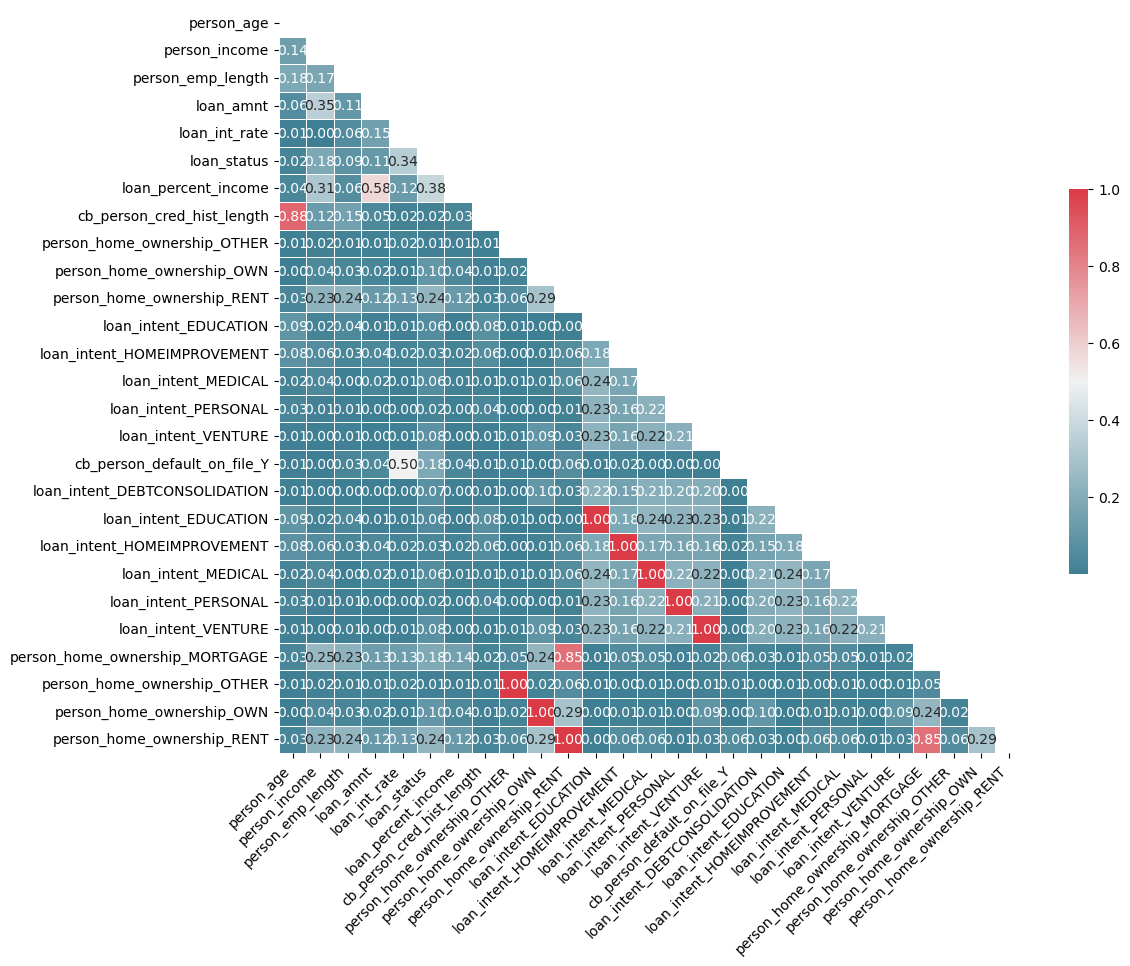

In [9]:
# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df_cleaned[['loan_intent', 'person_home_ownership']])

# Drop the original categorical columns from df_cleaned
df_cleaned = df_cleaned.drop(['loan_intent', 'person_home_ownership'], axis=1)

# Concatenate the original DataFrame with the one-hot encoded columns
df_combined = pd.concat([df_test_dummies, df_encoded], axis=1)

# Calculate absolute correlation matrix
corr = np.abs(df_combined.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))  # Adjust the size of the figure

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5,
                      annot=True, fmt=".2f", cbar_kws={"shrink": .5})  # Annotate with correlation values and format to 2 decimal places

# Tilt x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Set the alignment of x-axis labels to 'right'

# Set the y-axis labels to include all column names
plt.yticks(rotation=0)  # Reset rotation of y-axis labels to default (horizontal)

plt.show()


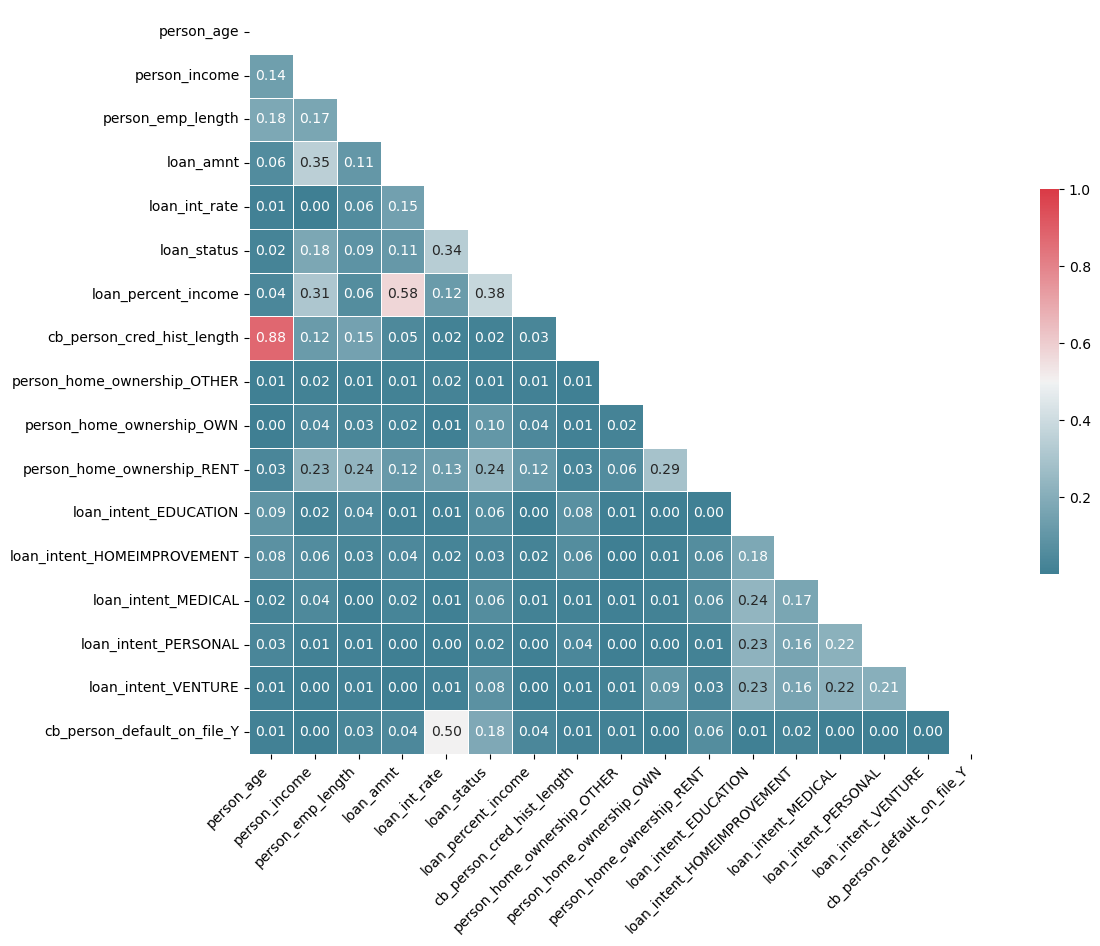

In [10]:
# Calculate absolute correlation matrix
corr = np.abs(df_test_dummies.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))  # Adjust the size of the figure

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5,
                      annot=True, fmt=".2f", cbar_kws={"shrink": .5})  # Annotate with correlation values and format to 2 decimal places

# Tilt x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Set the alignment of x-axis labels to 'right'

plt.show()

In [11]:
#setting features & target
features = df_test_dummies.drop(columns=["loan_status"])
target = df_test_dummies["loan_status"]

In [12]:
#implementing test/train split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [13]:
#Scaling the data
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

## KNN Test

In [14]:
#create instance of the model
knn = KNeighborsClassifier(n_neighbors=3)
#training the model
knn.fit(X_train, y_train)
#predicting new data points
pred = knn.predict(X_test.values)

c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
### Assessment metrics 

#accuracy
print("Accuracy score",(knn.score(X_test.values, y_test)*100))
#precision, recall, F1
print(classification_report(y_test, pred))

c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy score 82.65502183406113
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4467
           1       0.63      0.51      0.56      1258

    accuracy                           0.83      5725
   macro avg       0.75      0.71      0.73      5725
weighted avg       0.82      0.83      0.82      5725



## Decision Tree Test

In [16]:
#model selection
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train_norm, y_train)
#prediction
pred = tree.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4467
           1       0.91      0.69      0.79      1258

    accuracy                           0.92      5725
   macro avg       0.91      0.84      0.87      5725
weighted avg       0.92      0.92      0.91      5725



## Logistic Regression Test

In [17]:
#full data
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)
pred_lr = lr.predict(X_test)

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.27      0.02      0.03      4467
           1       0.19      0.82      0.31      1258

    accuracy                           0.19      5725
   macro avg       0.23      0.42      0.17      5725
weighted avg       0.25      0.19      0.09      5725



## Bagging & Pasting Test

In [18]:
#Just bagging

#model selection
bagging_cla = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_cla.fit(X_train_norm, y_train)
#prediction
pred = bagging_cla.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4467
           1       0.91      0.63      0.74      1258

    accuracy                           0.91      5725
   macro avg       0.91      0.81      0.84      5725
weighted avg       0.91      0.91      0.90      5725



In [19]:
#bagging & pasting

#model selection
bagging_cla_boot = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000, bootstrap=False)
bagging_cla_boot.fit(X_train_norm, y_train)
#prediction
pred_boot = bagging_cla_boot.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_boot))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4467
           1       0.91      0.64      0.75      1258

    accuracy                           0.91      5725
   macro avg       0.91      0.81      0.85      5725
weighted avg       0.91      0.91      0.90      5725



## Random Patches Test

In [20]:
#model selection
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)
forest.fit(X_train_norm, y_train)
#prediction
pred_forest = forest.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4467
           1       0.93      0.69      0.79      1258

    accuracy                           0.92      5725
   macro avg       0.92      0.84      0.87      5725
weighted avg       0.92      0.92      0.92      5725



## Ada Boosting Test

In [21]:
#model selection
ada_cla = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)
ada_cla.fit(X_train_norm, y_train)
#prediction
pred_ada = ada_cla.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4467
           1       0.92      0.68      0.78      1258

    accuracy                           0.92      5725
   macro avg       0.92      0.83      0.86      5725
weighted avg       0.92      0.92      0.91      5725



## Gradient Boosting Test

In [24]:
#model selection
gb_cla = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)
gb_cla.fit(X_train_norm, y_train)
#prediction
pred_gb = gb_cla.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4467
           1       0.89      0.72      0.80      1258

    accuracy                           0.92      5725
   macro avg       0.91      0.85      0.87      5725
weighted avg       0.92      0.92      0.92      5725



________________________________________________________________________________

## Analysis

Which model to choose? In this case, we will consider that false positives and false negatives are equally important to avoid, so we will use the F1 score to select the best model.

Nuance in F1 Scores:
- Accuracy: Accuracy is a measure of the overall correctness of the classifier. It calculates the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. 

- Macro Average: Macro average calculates the metric (in this case, the F1 score) independently for each class and then takes the unweighted mean of the scores. It treats all classes equally, regardless of their support (the number of instances in each class). It does NOT consider class imbalance.

- Weighted Average: Weighted average calculates the metric (F1 score) for each class independently and then takes the weighted average of the scores, where each score is weighted by the number of true instances for the class. It gives more weight to classes with larger support, which can be useful when dealing with class imbalance. 

There is class imbalance in the dataset (there are about there are 3.6x more records where loan_status==0).
- We will use the F1 weighted average to select the best performing model.

## Loan Status Target: Top performing models as measured by weighted average F1 scores

Two tests came out on top with weighted averae F1 scores of .92
1. Random Patches Test
2. Gradient Boosting Test

Furthermore, the two models have the same accuracy.

If we consider precision and recall in addition to the other metrics, we can gain further insight into the performance of the models, especially regarding their ability to correctly classify positive instances (e.g., predicting loan defaults).

1. Random Patches:
- Precision for class 1: 0.90
- Recall for class 1: 0.72

2. Gradient Boosting:
- Precision for class 1: 0.93
- Recall for class 1: 0.70

While both models have similar precision values for class 1, the recall values differ slightly. Random Patches has a higher recall (0.72) compared to Gradient Boosting (0.70) for class 1. This indicates that Random Patches may be better at capturing true positive instances (i.e., correctly identifying loan defaults) compared to Gradient Boosting.

We will choose the Random Patches Model as the winner!
_____________________________________________________________________________________________________


## Loan Status Target: Using the Model

- Client Profiling :  Using correlation coefficients, clients most and least likely to default

- Default Status Prediction: Use model to predict the likelihood of a client defaulting in the future.

In [25]:
### Calculating Correlation Coefficients of significant features against loan status (target)
# The Percentage of Income the Loan Represents
# Renting home
# Income
# Previous Default
# Home Mortgage
# Interest Rate
# Owning home

# Create the missing columns based on the deduced relationships
df_test_dummies['cb_person_default_on_file_N'] = ~df_test_dummies['cb_person_default_on_file_Y']
df_test_dummies['person_home_ownership_MORTGAGE'] = ~df_test_dummies['person_home_ownership_OTHER'] & ~df_test_dummies['person_home_ownership_OWN'] & ~df_test_dummies['person_home_ownership_RENT']

# Select the columns of interest including the newly generated ones
columns_of_interest = ['loan_percent_income', 'person_home_ownership_RENT', 'person_income',
                       'cb_person_default_on_file_Y', 'cb_person_default_on_file_N',
                       'person_home_ownership_MORTGAGE', 'loan_int_rate', 'person_home_ownership_OWN', 'loan_status']

# Calculate the correlation coefficients
correlation_coefficients = df_test_dummies[columns_of_interest].corr()['loan_status']

# Display the correlation coefficients
print(correlation_coefficients)

loan_percent_income               0.379459
person_home_ownership_RENT        0.236179
person_income                    -0.175377
cb_person_default_on_file_Y       0.181880
cb_person_default_on_file_N      -0.181880
person_home_ownership_MORTGAGE   -0.184367
loan_int_rate                     0.339290
person_home_ownership_OWN        -0.104891
loan_status                       1.000000
Name: loan_status, dtype: float64


In [32]:
df_test_dummies_fixed = df_test_dummies.drop(columns=["cb_person_default_on_file_N", "person_home_ownership_MORTGAGE","loan_status"])

In [33]:
display(df_test_dummies_fixed)

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              21           9600                5.0       1000          11.14   
1              25           9600                1.0       5500          12.87   
2              23          65500                4.0      35000          15.23   
3              24          54400                8.0      35000          14.27   
4              21           9900                2.0       2500           7.14   
...           ...            ...                ...        ...            ...   
28620          57          53000                1.0       5800          13.16   
28621          54         120000                4.0      17625           7.49   
28622          65          76000                3.0      35000          10.99   
28623          56         150000                5.0      15000          11.48   
28624          66          42000                2.0       6475           9.99   

       loan_percent_income  cb_person_cred_hist_length  \
0                     0.10                           2   
1                     0.57                           3   
2                     0.53                           2   
3                     0.55                           4   
4                     0.25                           2   
...                    ...                         ...   
28620                 0.11                          30   
28621                 0.15                          19   
28622                 0.46                          28   
28623                 0.10                          26   
28624                 0.15                          30   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            False                       True   
1                            False                      False   
2                            False                      False   
3                            False                      False   
4                            False                       True   
...                            ...                        ...   
28620                        False                      False   
28621                        False                      False   
28622                        False                      False   
28623                        False                      False   
28624                        False                      False   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
0                           False                   True   
1                           False                  False   
2                            True                  False   
3                            True                  False   
4                           False                  False   
...                           ...                    ...   
28620                       False                  False   
28621                       False                  False   
28622                        True                  False   
28623                       False                  False   
28624                        True                  False   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                            False                False                 False   
1                            False                 True                 False   
2                            False                 True                 False   
3                            False                 True                 False   
4                            False                False                 False   
...                            ...                  ...                   ...   
28620                        False                False                  True   
28621                        False                False                  True   
28622                         True                False                 False   
28623                    

In [35]:
### Predicting liklihood of future default

threshold = 0.5

# Initialize an empty list to store the predictions
predictions = []

# Loop through each row in df_test_dummies_fixed
for index, row in df_test_dummies_fixed.iterrows():
    # Predict the probability of default for the current row using the trained RandomForestClassifier model
    probability_default = forest.predict_proba(row.values.reshape(1, -1))[:, 1]
    
    # Determine whether a future default is probable based on a threshold
    future_default_probable = 'yes' if probability_default >= threshold else 'no'
    
    # Append the prediction to the list of predictions
    predictions.append(future_default_probable)

# Add the list of predictions as a new column "future_default_probable" to df_test_dummies
df_test_dummies_fixed['future_default_probable'] = predictions

c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:4

c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\darce\anaconda3\Lib\site-packages\sklearn\base.py:4

In [36]:
display(df_test_dummies_fixed)

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              21           9600                5.0       1000          11.14   
1              25           9600                1.0       5500          12.87   
2              23          65500                4.0      35000          15.23   
3              24          54400                8.0      35000          14.27   
4              21           9900                2.0       2500           7.14   
...           ...            ...                ...        ...            ...   
28620          57          53000                1.0       5800          13.16   
28621          54         120000                4.0      17625           7.49   
28622          65          76000                3.0      35000          10.99   
28623          56         150000                5.0      15000          11.48   
28624          66          42000                2.0       6475           9.99   

       loan_percent_income  cb_person_cred_hist_length  \
0                     0.10                           2   
1                     0.57                           3   
2                     0.53                           2   
3                     0.55                           4   
4                     0.25                           2   
...                    ...                         ...   
28620                 0.11                          30   
28621                 0.15                          19   
28622                 0.46                          28   
28623                 0.10                          26   
28624                 0.15                          30   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            False                       True   
1                            False                      False   
2                            False                      False   
3                            False                      False   
4                            False                       True   
...                            ...                        ...   
28620                        False                      False   
28621                        False                      False   
28622                        False                      False   
28623                        False                      False   
28624                        False                      False   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
0                           False                   True   
1                           False                  False   
2                            True                  False   
3                            True                  False   
4                           False                  False   
...                           ...                    ...   
28620                       False                  False   
28621                       False                  False   
28622                        True                  False   
28623                       False                  False   
28624                        True                  False   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                            False                False                 False   
1                            False                 True                 False   
2                            False                 True                 False   
3                            False                 True                 False   
4                            False                False                 False   
...                            ...                  ...                   ...   
28620                        False                False                  True   
28621                        False                False                  True   
28622                         True                False                 False   
28623                    

In [39]:
file_path = "df_test_dummies_fixed.csv"

# Export the DataFrame to a CSV file
df_test_dummies_fixed.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to df_test_dummies_fixed.csv


___________________________________________________________________________

# Target = Loan Intent

In [ ]:
df1.loan_intent.value_counts()
df1_test=df1.copy()

In [ ]:
#Label Encoding

df1_test[['cb_person_default_on_file']] =  df1_test[['cb_person_default_on_file']].replace({'Y': 1, 'N': 0})

df1_test_use = df1_test.drop(['loan_intent'], axis=1)

df1_test_cate_trans = pd.get_dummies(df1_test_use, df1_test_use.select_dtypes(include=['object']).columns, drop_first=True)

df1_test_use = df1_test_cate_trans

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df1_test_use['loan_intent'] = label_encoder.fit_transform(df1_test['loan_intent'])

df1_test_use.head()

In [ ]:
#setting features & target
features_v1 = df1_test_use.drop(columns=["loan_intent"])
target = df1_test["loan_intent"]

#implementing test/train split
X_train, X_test, y_train, y_test = train_test_split(features_v1, target, test_size=0.20, random_state=0)

#Scaling the data
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

## KNN Test

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
#training the model
knn.fit(X_train, y_train)
#predicting new data points
pred = knn.predict(X_test.values)

print("Accuracy score",(knn.score(X_test.values, y_test)*100))
#precision, recall, F1
print(classification_report(y_test, pred))

In [ ]:
# Now testing with scaled variables
knn = KNeighborsClassifier(n_neighbors=5)
#training the model
knn.fit(X_train_norm.values, y_train)
#predicting new data points
pred =knn.predict(X_test_norm.values)
print('Accuracy:', (knn.score(X_test_norm.values, y_test))*100)

print(classification_report(y_test, pred))

In [ ]:
#checking if y_test classes are balanced
print(y_test.value_counts())

## The Chi-Square Test of Independence 

In [ ]:
#Understand correlation between categorical features and target
from scipy.stats import chi2_contingency

# loan_intent vs loan_status
freq_df = df1_test_use[['loan_intent', 'loan_status']].value_counts().reset_index().pivot_table(index='loan_intent', values='count', columns='loan_status')
freq_df

In [ ]:
# loan_intent vs cb_person_default_on_file

freq_df = df1_test_use[['loan_intent', 'cb_person_default_on_file']].value_counts().reset_index().pivot_table(index='loan_intent', values='count', columns='cb_person_default_on_file')
freq_df

## Logistic Regression Test

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_norm, y_train)
pred = LR.predict(X_test_norm)

print(classification_report(y_test, pred))

## Decision Tree Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train_norm, y_train)
pred = tree.predict(X_test_norm)
print(classification_report(y_test, pred))

In [ ]:
# Understand feature importance
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance

In [ ]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_norm.columns))
print(tree_viz)

## Bagging & Pasting Test

In [ ]:
bagging_clas = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)
bagging_clas.fit(X_train_norm, y_train)
pred = bagging_clas.predict(X_test_norm)
print(classification_report(y_test, pred))

In [ ]:
#bagging & pasting

bagging_clas_boot = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000, bootstrap=False)
bagging_clas_boot.fit(X_train_norm, y_train)
#prediction
pred_boot = bagging_clas_boot.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_boot))

## Random Patches Test

In [ ]:
#model selection
forest1 = RandomForestClassifier(n_estimators=100,
                             max_depth=20)
forest1.fit(X_train_norm, y_train)
#prediction
pred_forest1 = forest1.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_forest1))

## Ada Boosting Test

In [ ]:
#model selection
ada_clas = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)
ada_clas.fit(X_train_norm, y_train)
#prediction
pred_ada1 = ada_clas.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_ada1))

## Gradient Boosting

In [ ]:
#model selection
gb_clas = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)
gb_clas.fit(X_train_norm, y_train)
#prediction
pred_gb1 = gb_clas.predict(X_test_norm)
#model assessment
print(classification_report(y_test, pred_gb1))

Unfortunately, none of the models worked for this target.
_____________________________________________________________________________________________________________

# Target = Loan Amount

In [ ]:
df = pd.read_csv("credit_risk_cleaned.csv")

In [ ]:
# Convert non-numerical columns into dummy variables (True/False)
df_dummies = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent',"person_emp_length", 'cb_person_default_on_file'])
df_dummies

In [ ]:
# ['loan_grade' focus] :

# Convert 'loan_grade' column into dummy variables (one-hot encoding)
loan_grade_dummies = pd.get_dummies(df['loan_grade'], prefix='loan_grade')

# Concatenate the loan_grade_dummies DataFrame with df_dummies
df_dummies = pd.concat([df_dummies, loan_grade_dummies], axis=1)

# Drop the original 'loan_grade' column
if 'loan_grade' in df_dummies.columns:   # Check if 'loan_grade' column exists before dropping
    df_dummies.drop('loan_grade', axis=1, inplace=True)

In [ ]:
# loan_grade, loan_intent, person_home_ownership
# keep the booleans

df_2 = df.copy()
df_2_test = df_2.drop(['person_home_ownership', 'loan_intent', 'loan_grade'], axis=1)
df_2_test.sample(4)

In [ ]:
#changing the format of 'cb_person_default_on_file' (Y/N) to int/boolean (0/1)
df_2_test[['cb_person_default_on_file']] =  df_2_test[['cb_person_default_on_file']].replace({'Y': 1, 'N': 0})

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
loan_amount = df_2_test["loan_amnt"]

plt.hist(loan_amount, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal', n_quantiles=50, random_state=0)
df_2_test['loan_amnt_transformed'] = qt.fit_transform(df_2_test[['loan_amnt']])
df_2_test['loan_amnt_transformed'].head()

## Defining our features and target

In [ ]:
# Define features using df_dummies
features = df_dummies[["person_income", "loan_grade_A", "loan_grade_B", "loan_grade_C",
                        "loan_grade_D", "loan_grade_E", "loan_grade_F", "loan_grade_G", "loan_int_rate"]]

In [ ]:
features_2 = df_2_test.drop(['loan_amnt'], axis=1)
features_2.sample(4)

In [ ]:
target = df[["loan_amnt"]]
target

In [ ]:
target_2 = df_2_test['loan_amnt']

## Perform Train Test Split + Scaling our model

In [ ]:
# [MODIFICATIONS BETWEEN OUR MODELS HERE !!]
# launching the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.20, random_state=0)

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
# Fit our normalizer to our training data:
normalizer.fit(X_train)

In [ ]:
# Transforming our training and testing data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
# transforming our normalized trained set (X_train_norm) to a dataframe
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

In [ ]:
# transforming our normalized test set (X_test_norm) to a dataframe
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [ ]:
# Assuming df is your DataFrame
loan_amount = df_2_test["loan_amnt"]

plt.hist(loan_amount, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

## Select model - Knn Regressor

In [ ]:
# since our target is loan-amnt', we'll use the Knn-Regressor method:

knn = KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn.score(X_test_norm, y_test)

In [ ]:
pred = knn.predict(X_test_norm)
pred

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)

print(MSE)
print(RMSE)

## Linear Regression [Regression only]

In [ ]:
#importing the good library for linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
# Training Linear Regression with our normalized data
lin_reg.fit(X_train_norm, y_train)

In [ ]:
# Evaluate model's performance
pred_linreg = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_linreg, y_test))
print("RMSE", mean_squared_error(pred_linreg, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

## Decision tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=10)

In [ ]:
tree.fit(X_train_norm, y_train)

In [ ]:
pred_dtree = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_dtree, y_test))
print("RMSE", mean_squared_error(pred_dtree, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

______________________________________________________________________________________________________

# Target = Prior Default on File

In [ ]:
df_credit = pd.read_csv("credit_risk_cleaned.csv")
df_credit.head()

In [ ]:
df_copy = df_credit.copy()

In [ ]:
df_copy[['cb_person_default_on_file']] =  df_copy[['cb_person_default_on_file']].replace({'Y': 1, 'N': 0})

df1_test_use = df_copy.drop(['cb_person_default_on_file'], axis=1)

df1_test_cate_trans = pd.get_dummies(df1_test_use, df1_test_use.select_dtypes(include=['object']).columns, drop_first=True)

df1_test_use = df1_test_cate_trans

df1_test_use['cb_person_default_on_file'] = df_copy['cb_person_default_on_file']

df1_test_use.head()

In [ ]:
features = df1_test_use.drop(columns=['cb_person_default_on_file'])
target = df1_test_use["cb_person_default_on_file"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm, y_train)

In [ ]:
knn.score(X_test_norm.values, y_test)

In [ ]:
pred = knn.predict(X_test_norm.values)
pred

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, pred), recall_score(y_test, pred)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)

print(MSE)
print(RMSE)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [ ]:
RMSE /y_test.mean() #how large the root of R2 = coeff of variation

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt='g') 

In [ ]:
# check imbalanced data
defaulters = df1_test_use["cb_person_default_on_file"].value_counts()
defaulters.plot(kind="bar")
plt.show()

In [ ]:
y_test.value_counts()

In [ ]:
#undersampling
previous_defaulters  = df1_test_use[df1_test_use["cb_person_default_on_file"] == 1]
no_previous_defaulters = df1_test_use[df1_test_use["cb_person_default_on_file"] == 0]

In [ ]:
from sklearn.utils import resample

In [ ]:
# undersample majority
no_previous_defaulters_undersampled = resample(no_previous_defaulters, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(previous_defaulters),
                                    random_state=0)

In [ ]:
display(previous_defaulters.shape)
display(no_previous_defaulters_undersampled.shape)

In [ ]:
df1_test_use_undersampled = pd.concat([previous_defaulters,no_previous_defaulters_undersampled])
df1_test_use_undersampled.head()

In [ ]:
y_train_under = df1_test_use_undersampled['cb_person_default_on_file'].copy()
X_train_under = df1_test_use_undersampled.drop('cb_person_default_on_file',axis = 1).copy()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_norm)

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt='g') 

## Decision Tree

In [ ]:
TR = DecisionTreeClassifier(max_depth=10) 
TR.fit(X_train_under, y_train_under)
pred = TR.predict(X_test_norm)

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt='g') 

## Bagging

In [ ]:
BC = BaggingClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=100,max_samples=1000)

BC.fit(X_train_under, y_train_under)

pred = BC.predict(X_test_norm)


print(classification_report(y_test, pred)) # seem to be okk !!

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt='g')

In [ ]:
gb_class = GradientBoostingClassifier(max_depth=20,n_estimators=100)
gb_class.fit(X_train_under, y_train_under)

pred = gb_class.predict(X_test_norm)

print(classification_report(y_test, pred))

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt='g')

In [ ]:
ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), 
                            n_estimators=100)
ada_reg.fit(X_train_under, y_train_under)
pred = ada_reg.predict(X_test_norm)

print(classification_report(y_test, pred)) 

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt='g')

## Bagging and Pasting

In [ ]:

BG = BaggingClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=100,max_samples=1000,bootstrap=False)

BG.fit(X_train_norm, y_train)

pred = BG.predict(X_test_norm)

## Gradient Boosting

In [ ]:

gb_class = GradientBoostingClassifier(max_depth=20,n_estimators=100)
gb_class.fit(X_train_norm, y_train)

pred = gb_class.predict(X_test_norm)

print(classification_report(y_test, pred))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10) 

In [ ]:
tree.fit(X_train_norm, y_train)

In [ ]:
pred = tree.predict(X_test_norm)

print("R2 score", tree.score(X_test_norm, y_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

## Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)

In [ ]:
forest.fit(X_train_norm, y_train)

In [ ]:
pred = forest.predict(X_test_norm)


print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

## Logistic Regression

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

# Features selection 

Now let's do a selection of features based on correlactions between themselves but also with the target.

We want low correlaction between features, but high correlaction between features and our target.

By the correlation matrix we can see that:
- "AveRooms" is highly correlated with "AveBedrms", so we drop the one less correlated with our target
- "AveOccup" and "Population" also have pretty low correlation with our target variable, so lets remove them from our selected features

Then, we remove those columns from X_test and x_train to apply the kn.fit(), score and predict

In [ ]:
#Heatmap
corr=np.abs(df1_test_use.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## Chi Test

- The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**. 
- Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.

In [ ]:
crosstab_result1 = pd.crosstab(df_copy['cb_person_default_on_file'], df_copy['person_home_ownership'])

crosstab_result1

In [ ]:
from scipy.stats import chi2_contingency


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result1)

chi2_statistic, chi2_p_value # significant assoc. between 'cb_person_default_on_file' & 'person_home_ownership'

In [ ]:
import seaborn as sns

# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
sns.heatmap(crosstab_result1, annot=True, cmap="YlGnBu", fmt="d")

In [ ]:
crosstab_result2 = pd.crosstab(df_copy['cb_person_default_on_file'], df_copy['loan_grade'])
crosstab_result2

In [ ]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result2)

chi2_statistic, chi2_p_value # assoc between 'cb_person_default_on_file' & 'loan_grade'

In [ ]:
# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
sns.heatmap(crosstab_result2, annot=True, cmap="YlGnBu", fmt="d")

In [ ]:
crosstab_result3 = pd.crosstab(df_copy['cb_person_default_on_file'], df_copy['loan_intent'])
crosstab_result3

In [ ]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result3)

chi2_statistic, chi2_p_value # no

In [ ]:
crosstab_result4 = pd.crosstab(df_copy['cb_person_default_on_file'], df_copy['loan_status'])
crosstab_result4

In [ ]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result4)

chi2_statistic, chi2_p_value # significant assoc. between 'cb_person_default_on_file' & 'loan_status'

In [ ]:
# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
sns.heatmap(crosstab_result4, annot=True, cmap="YlGnBu", fmt="d")

## Model Application

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df1_test_use = df1_test_use.drop(['cb_person_default_on_file'], axis=1)

In [ ]:
### Predicting liklihood of future default

threshold = 0.5

# Initialize an empty list to store the predictions
predictions_default = []

# Loop through each row in df1_test_use
for index, row in df1_test_use.iterrows():
    # Predict the probability of default for the current row using the trained RandomForestClassifier model
    probability_default = forest.predict_proba(row.values.reshape(1, -1))[:, 1]
    
    # Determine whether a future default is probable based on a threshold
    future_default_probable_1 = 'yes' if probability_default >= threshold else 'no'
    
    # Append the prediction to the list of predictions_default
    predictions_default.append(future_default_probable_1)

# Add the list of predictions as a new column "future_default_probable_1" to df_test_dummies
df1_test_use['future_default_probable_1'] = predictions_default

In [ ]:
# Calculate the value counts of each class
class_counts = df_credit["cb_person_default_on_file"].value_counts()

# Calculate the total number of samples
total_samples = class_counts.sum()

# Calculate the percentage of each class
class_percentages = (class_counts / total_samples) * 100

# Display the percentages
print(class_percentages)

# Calculate the value counts of each class
class_count = df1_test_use['future_default_probable_1'].value_counts()

# Calculate the total number of samples
total_sample = class_count.sum()

# Calculate the percentage of each class
class_percentage = (class_count / total_sample) * 100

# Display the percentages
print(class_percentage)